<a href="https://colab.research.google.com/github/MachineLearningWithHuman/cloud/blob/master/Tensorflow_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tensorflow==1.8.0

     |████████████████████████████████| 49.1MB 83kB/s 
     |████████████████████████████████| 3.1MB 37.2MB/s 
     |████████████████████████████████| 890kB 40.3MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=5e0b4fef9cc54bb323b0016e6747a687c7a5c83719f961cf62806ceef34bcd6e
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


#Linear Regression

# <b>Assumptions in Linear Regression</b>


*   **Linear relationship.**It is also important to check for outliers since linear regression is sensitive to outlier effects.  The linearity assumption can best be tested with scatter plots.
![alt text](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2F2.bp.blogspot.com%2F-TcRUfR96Flw%2FUBhSO2LK9CI%2FAAAAAAAAAgY%2FI40YLjWavIs%2Fs1600%2Flinear%2Bvs%2Bnonlinear.jpg&f=1&nofb=1)
*   **Multivariate normality.**This assumption can best be checked with a histogram or a Q-Q-Plot.  Normality can be checked with a goodness of fit test, e.g., the Kolmogorov-Smirnov test.  When the data is not normally distributed a non-linear transformation (e.g., log-transformation) might fix this issue.
![alt text](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.gya82KlV8aRluXMS8OCOOAAAAA%26pid%3DApi&f=1)
*   **No or little multicollinearity.**Multicollinearity occurs when the independent variables are too highly correlated with each other.
![alt text](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.stack.imgur.com%2FJfCrn.jpg&f=1&nofb=1)
Multicollinearity may be tested with three central criteria:

1.    **Correlation matrix** – when computing the matrix of Pearson’s Bivariate Correlation among all independent variables the correlation coefficients need to be smaller than 1.
2.   **Tolerance –**the tolerance measures the influence of one independent variable on all other independent variables; the tolerance is calculated with an initial linear regression analysis.  Tolerance is defined as **T = 1 – R²** for these first step regression analysis.  With T < 0.1 there might be multicollinearity in the data and with T < 0.01 there certainly is.
3.  **Variance Inflation Factor (VIF) –** the variance inflation factor of the linear regression is defined as VIF = 1/T. With VIF > 5 there is an indication that multicollinearity may be present; with VIF > 10 there is certainly multicollinearity among the variables.
*   No auto-correlation
*   Homoscedasticity (static variance)








# Overview

Our goal is to learn a linear model $\hat{y}$ that models $y$ given $X$. 

$\hat{y} = XW + b$
* $\hat{y}$ = predictions | $\in \mathbb{R}^{NX1}$ ($N$ is the number of samples)
* $X$ = inputs | $\in \mathbb{R}^{NXD}$ ($D$ is the number of features)
* $W$ = weights | $\in \mathbb{R}^{DX1}$ 
* $b$ = bias | $\in \mathbb{R}^{1}$ 

In [1]:
import tensorflow as tf
print(tf.__version__) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarning: Passing (type, 1) or 

1.8.0


In [0]:
# values of x = [1,2,3,4]
# values of y = [0,-1,-2,-3]

x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]

In [0]:
#defining the weight and bias
W = tf.Variable([-.5], dtype=tf.float32)
b = tf.Variable([.5], dtype=tf.float32)


In [0]:

x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32) 

In [0]:
# using linear function y = Wx + b
lm = W*x + b

In [0]:
#loss calculation
#calculating squared error
loss = tf.reduce_sum(tf.square(lm - y))

In [0]:
#using Gradient Descent with learning rate 0.01
optimizer = tf.train.GradientDescentOptimizer(0.01)

In [0]:
#minimizing loss
train = optimizer.minimize(loss)

In [0]:
session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

In [10]:
#training model for 1000 iterations
for i in range(1000):
    session.run(train, {x:x_train, y:y_train})

#final values of W and b
print(session.run([W,b]))
#output of the model
print(session.run(lm,{x:[5,6,7,8]}))

[array([-0.99999887], dtype=float32), array([0.9999966], dtype=float32)]
[-3.9999976 -4.9999967 -5.999995  -6.9999943]


#putting all things in an Example

In [13]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 3.9MB 40.5MB/s 
     |████████████████████████████████| 450kB 40.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=7c0ef095f2920a40407b9a2ed9ef2f656bf5d69cde077ed33c8c02209b2be7b0
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 1.8.0
    Uninstalling tensorboard-1.8.0:
      Successfully uninstalled tensorboard-1.8.0
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: 

In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [4]:
# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [6]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 1us/step


'/root/.keras/datasets/auto-mpg.data'

In [7]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [8]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
dataset = dataset.dropna()

In [0]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [12]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

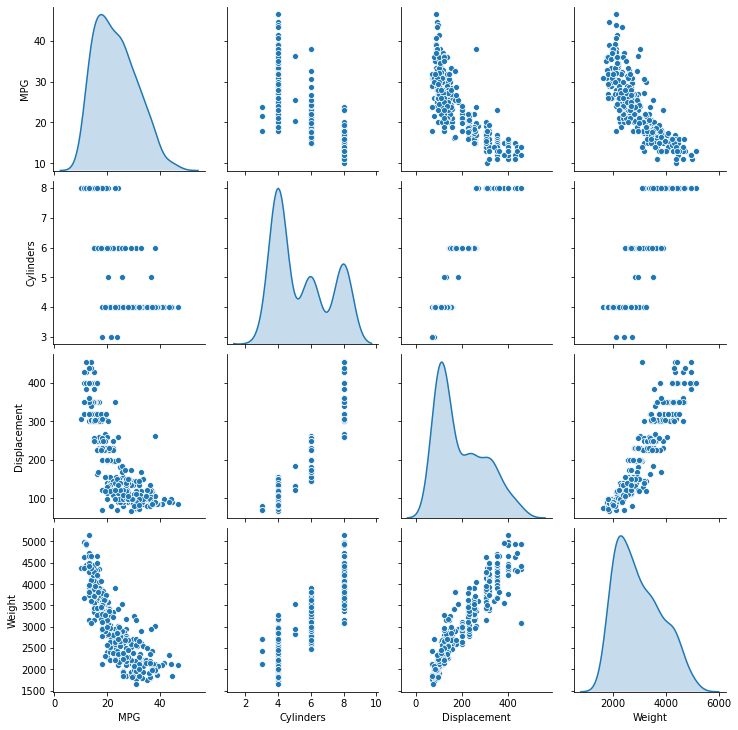

In [14]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [15]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [0]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [21]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:581.3500,  mae:22.8614,  mse:581.3500,  val_loss:568.2780,  val_mae:22.5951,  val_mse:568.2780,  
....................................................................................................
Epoch: 100, loss:6.0896,  mae:1.7196,  mse:6.0896,  val_loss:8.2068,  val_mae:2.2227,  val_mse:8.2068,  
....................................................................................................
Epoch: 200, loss:5.6387,  mae:1.6145,  mse:5.6387,  val_loss:7.9692,  val_mae:2.0820,  val_mse:7.9692,  
....................................................................................................
Epoch: 300, loss:4.7068,  mae:1.4677,  mse:4.7068,  val_loss:8.0490,  val_mae:2.2005,  val_mse:8.0490,  
....................................................................................................
Epoch: 400, loss:4.1480,  mae:1.3455,  mse:4.1480,  val_loss:7.9982,  val_mae:2.0967,  val_mse:7.9982,  
..............................................................

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.486528,1.057980,2.486527,10.923737,2.665204,10.923738,995
996,2.327441,1.014525,2.327441,9.607400,2.411685,9.607400,996
997,2.368914,1.007058,2.368913,9.889866,2.446352,9.889866,997
998,2.375216,0.976147,2.375216,9.828895,2.458239,9.828895,998
999,2.430442,0.995060,2.430442,9.490696,2.398023,9.490697,999


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

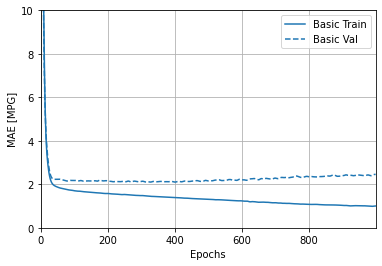

In [24]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

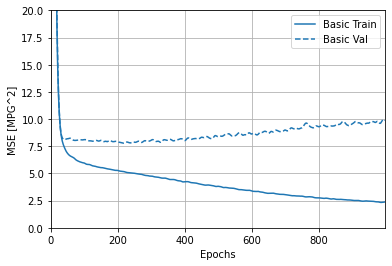

In [25]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [26]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])



Epoch: 0, loss:584.6748,  mae:22.9937,  mse:584.6749,  val_loss:577.4092,  val_mae:22.8456,  val_mse:577.4092,  
.................................................

Text(0, 0.5, 'MAE [MPG]')

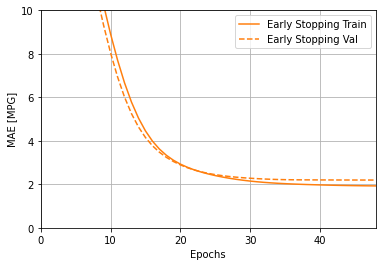

In [27]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [28]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 6.0221 - mae: 1.9002 - mse: 6.0221
Testing set Mean Abs Error:  1.90 MPG


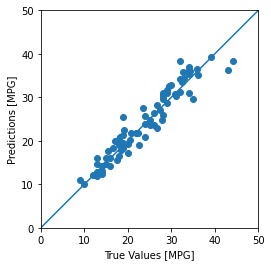

In [29]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

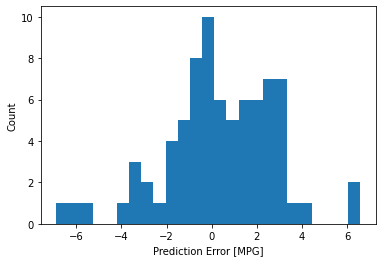

In [30]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

#Conclusion
This notebook introduced a few techniques to handle a regression problem.

1.   Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).
2.    Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).
3.    When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
4.   If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
5.   Early stopping is a useful technique to prevent overfitting.

**Congratulations For learning Linear Regression in tensorflow Like share and subscribe us on Youtube**
[youtube](https://)[](https://www.youtube.com/channel/UCiWd572-4LeH0IqJ5A7LavA/)